# Introduction

The dataset at the center of this project is a comprehensive insurance dataset containing records of various policyholders and their respective insurance details. Each row in the dataset represents an individual policyholder, identified by a unique POLICYHOLDER_ID. The dataset captures various attributes related to the policyholder and their insurance policies, such as:

SEX: The gender of the policyholder.
INSR_BEGIN: The start date of the insurance policy.
INSR_END: The end date of the insurance policy.
INSR_TYPE: The type of insurance policy.
INSURED_VALUE: The value of the insured asset.
PREMIUM: The premium amount paid by the policyholder.
PROD_YEAR: The year the product was manufactured or started.
TYPE_VEHICLE: The type of vehicle insured.
MAKE: The make of the vehicle.
CLAIM_PAID: The amount paid out in claims.
The primary variable of interest in this dataset is the PREMIUM, which represents the amount paid by the policyholder for their insurance coverage. By performing Exploratory Data Analysis (EDA) on this dataset, I aim to uncover patterns, trends, and insights that can provide a deeper understanding of the factors influencing premium amounts, as well as other significant relationships within the data.

The EDA process will include data cleaning, visualization, and statistical analysis to identify any anomalies, correlations, and underlying structures in the data. This analysis will serve as a foundation for building predictive models and making data-driven decisions in the context of insurance policies and premium calculations.

# Notes:

1) Sex variable has 3 factors (0,1,2) which relate to "Male", "Female", "Unknown"
2) INSR_TYPE variable has 3 factors (1201,1202,1204) which relate to "Comprehensive", "Third Party with Fire and Theft", "Third Party Only"
3) Where there was missing data pertaining to a policyholder, all data surrounding that policyholder was removed, as the purpose is to at a later stage compile a summary for each policyholder

# Initial Setup

### Setting working directory

In [1]:
setwd("~/02_Corporate Profile/Project Portfolio/Vehicle Insurance Data")

### Loading all vehicle insurance data

In [17]:
motor_data_2014_2018 = read.csv("~/02_Corporate Profile/Project Portfolio/Vehicle Insurance Data/motor_data14-2018.csv")

# Initial Data Inspection & Cleaning

 ### Obtaining initial understanding of the data

In [18]:
# Obtaining the number of rows and columns
dim(motor_data_2014_2018)

[1] 508499     16

In [3]:
# Viewing the dataframe to determine any columns that ??????
head(motor_data_2014_2018)

SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,08-AUG-17,07-AUG-18,08,1202,519755.2,5097.83,5000029885,2007,4,6,Pick-up,3153,NISSAN,Own Goods,NA
0,08-AUG-16,07-AUG-17,08,1202,519755.2,6556.52,5000029885,2007,4,6,Pick-up,3153,NISSAN,Own Goods,NA
0,08-AUG-15,07-AUG-16,08,1202,519755.2,6556.52,5000029885,2007,4,6,Pick-up,3153,NISSAN,Own Goods,NA
0,08-AUG-14,07-AUG-15,08,1202,519755.2,5102.83,5000029885,2007,4,6,Pick-up,3153,NISSAN,Own Goods,NA
0,08-AUG-17,07-AUG-18,08,1202,1400000.0,13304.87,5000029901,2010,4,7,Pick-up,2494,TOYOTA,Own Goods,NA
0,08-AUG-16,07-AUG-17,08,1202,1400000.0,16438.15,5000029901,2010,4,7,Pick-up,2494,TOYOTA,Own Goods,NA


In [19]:
# Determining if there are any missing data points, and in which column
sapply(motor_data_2014_2018, function(x) sum(is.na(x)))

SEX        INSR_BEGIN          INSR_END      EFFECTIVE_YR 
                0                 0                 0                 0 
        INSR_TYPE     INSURED_VALUE           PREMIUM         OBJECT_ID 
                0                 0                13                 0 
        PROD_YEAR         SEATS_NUM CARRYING_CAPACITY      TYPE_VEHICLE 
               63                95            116834                 0 
          CCM_TON              MAKE             USAGE        CLAIM_PAID 
                6                 5                 0            470727

### Determining (and adjusting where needed) the structure of the data

In [20]:
# Viewing the existing structure of the data
str(motor_data_2014_2018)

'data.frame':	508499 obs. of  16 variables:
 $ SEX              : int  0 0 0 0 0 0 0 0 1 1 ...
 $ INSR_BEGIN       : Factor w/ 1461 levels "01-APR-15","01-APR-16",..: 344 343 342 341 344 343 342 341 1144 1143 ...
 $ INSR_END         : Factor w/ 1691 levels "01-APR-15","01-APR-16",..: 345 344 343 342 345 344 343 342 1265 1264 ...
 $ EFFECTIVE_YR     : Factor w/ 140 levels "","-1","-2","-6",..: 21 21 21 21 21 21 21 21 27 27 ...
 $ INSR_TYPE        : int  1202 1202 1202 1202 1202 1202 1202 1202 1202 1202 ...
 $ INSURED_VALUE    : num  519755 519755 519755 519755 1400000 ...
 $ PREMIUM          : num  5098 6557 6557 5103 13305 ...
 $ OBJECT_ID        : num  5e+09 5e+09 5e+09 5e+09 5e+09 ...
 $ PROD_YEAR        : int  2007 2007 2007 2007 2010 2010 2010 2010 2012 2012 ...
 $ SEATS_NUM        : int  4 4 4 4 4 4 4 4 0 0 ...
 $ CARRYING_CAPACITY: num  6 6 6 6 7 7 7 7 220 220 ...
 $ TYPE_VEHICLE     : Factor w/ 11 levels "Automobile","Bus",..: 4 4 4 4 4 4 4 4 11 11 ...
 $ CCM_TON          : num 

In [21]:
# Adjusting the structure of the data
motor_data_2014_2018$INSR_BEGIN = as.Date(motor_data_2014_2018$INSR_BEGIN, format = "%d-%b-%y")
motor_data_2014_2018$INSR_END = as.Date(motor_data_2014_2018$INSR_END, format = "%d-%b-%y")
motor_data_2014_2018$SEX = as.factor(motor_data_2014_2018$SEX)
motor_data_2014_2018$INSR_TYPE = as.factor(motor_data_2014_2018$INSR_TYPE)
motor_data_2014_2018$MAKE = as.factor(motor_data_2014_2018$MAKE)
motor_data_2014_2018$USAGE = as.factor(motor_data_2014_2018$USAGE)
motor_data_2014_2018$TYPE_VEHICLE    = as.factor(motor_data_2014_2018$TYPE_VEHICLE)

In [22]:
# Ensuring the structure of the data is as required
str(motor_data_2014_2018)

'data.frame':	508499 obs. of  16 variables:
 $ SEX              : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 1 1 1 2 2 ...
 $ INSR_BEGIN       : Date, format: "2017-08-08" "2016-08-08" ...
 $ INSR_END         : Date, format: "2018-08-07" "2017-08-07" ...
 $ EFFECTIVE_YR     : Factor w/ 140 levels "","-1","-2","-6",..: 21 21 21 21 21 21 21 21 27 27 ...
 $ INSR_TYPE        : Factor w/ 3 levels "1201","1202",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ INSURED_VALUE    : num  519755 519755 519755 519755 1400000 ...
 $ PREMIUM          : num  5098 6557 6557 5103 13305 ...
 $ OBJECT_ID        : num  5e+09 5e+09 5e+09 5e+09 5e+09 ...
 $ PROD_YEAR        : int  2007 2007 2007 2007 2010 2010 2010 2010 2012 2012 ...
 $ SEATS_NUM        : int  4 4 4 4 4 4 4 4 0 0 ...
 $ CARRYING_CAPACITY: num  6 6 6 6 7 7 7 7 220 220 ...
 $ TYPE_VEHICLE     : Factor w/ 11 levels "Automobile","Bus",..: 4 4 4 4 4 4 4 4 11 11 ...
 $ CCM_TON          : num  3153 3153 3153 3153 2494 ...
 $ MAKE             : Factor w/ 746 levels " 

### Formating column format of the data

In [23]:
### Viewing all columns to identify any that will not be needed
colnames(motor_data_2014_2018)

[1] "SEX"               "INSR_BEGIN"        "INSR_END"         
 [4] "EFFECTIVE_YR"      "INSR_TYPE"         "INSURED_VALUE"    
 [7] "PREMIUM"           "OBJECT_ID"         "PROD_YEAR"        
[10] "SEATS_NUM"         "CARRYING_CAPACITY" "TYPE_VEHICLE"     
[13] "CCM_TON"           "MAKE"              "USAGE"            
[16] "CLAIM_PAID"

In [24]:
### Removing columns that will not be needed
motor_data_2014_2018 = subset(motor_data_2014_2018, select = -c(EFFECTIVE_YR, CARRYING_CAPACITY, SEATS_NUM, CCM_TON, USAGE))
head(motor_data_2014_2018)

SEX,INSR_BEGIN,INSR_END,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,TYPE_VEHICLE,MAKE,CLAIM_PAID
0,2017-08-08,2018-08-07,1202,519755.2,5097.83,5000029885,2007,Pick-up,NISSAN,NA
0,2016-08-08,2017-08-07,1202,519755.2,6556.52,5000029885,2007,Pick-up,NISSAN,NA
0,2015-08-08,2016-08-07,1202,519755.2,6556.52,5000029885,2007,Pick-up,NISSAN,NA
0,2014-08-08,2015-08-07,1202,519755.2,5102.83,5000029885,2007,Pick-up,NISSAN,NA
0,2017-08-08,2018-08-07,1202,1400000.0,13304.87,5000029901,2010,Pick-up,TOYOTA,NA
0,2016-08-08,2017-08-07,1202,1400000.0,16438.15,5000029901,2010,Pick-up,TOYOTA,NA


In [25]:
### Renaming columns
colnames(motor_data_2014_2018)[colnames(motor_data_2014_2018) == "OBJECT_ID"] = "POLICYHOLDER_ID"

In [30]:
### Rearanging the the columns into a sensible order
motor_data_2014_2018 = motor_data_2014_2018[, c(
  "POLICYHOLDER_ID", "SEX", "INSR_BEGIN", "INSR_END", "INSR_TYPE", 
  "INSURED_VALUE", "PREMIUM", "PROD_YEAR", "TYPE_VEHICLE", 
  "MAKE", "CLAIM_PAID"
)]
head(motor_data_2014_2018)

    # Column order:
        # Policyholder Information: Information about the policyholder.
          # POLICYHOLDER_ID
          # SEX
        # Insurance Details: Dates and types of insurance.
          # INSR_BEGIN
          # INSR_END
          # INSR_TYPE
          # INSURED_VALUE
          # PREMIUM
        # Vehicle Details: Information about the insured vehicle.
          # PROD_YEAR
          # TYPE_VEHICLE
          # MAKE
        # Claims Information: Information about claims.
          # CLAIM_PAID

POLICYHOLDER_ID,SEX,INSR_BEGIN,INSR_END,INSR_TYPE,INSURED_VALUE,PREMIUM,PROD_YEAR,TYPE_VEHICLE,MAKE,CLAIM_PAID
5000029885,0,2017-08-08,2018-08-07,1202,519755.2,5097.83,2007,Pick-up,NISSAN,NA
5000029885,0,2016-08-08,2017-08-07,1202,519755.2,6556.52,2007,Pick-up,NISSAN,NA
5000029885,0,2015-08-08,2016-08-07,1202,519755.2,6556.52,2007,Pick-up,NISSAN,NA
5000029885,0,2014-08-08,2015-08-07,1202,519755.2,5102.83,2007,Pick-up,NISSAN,NA
5000029901,0,2017-08-08,2018-08-07,1202,1400000.0,13304.87,2010,Pick-up,TOYOTA,NA
5000029901,0,2016-08-08,2017-08-07,1202,1400000.0,16438.15,2010,Pick-up,TOYOTA,NA


### Creating 2018 insurance dataframe

In [31]:
# Creating the dataframe
insurance_data = motor_data_2014_2018[format(motor_data_2014_2018$INSR_END, "%Y") == "2018", ]

# Resetting the row names to ascending order
rownames(insurance_data) = NULL
head(insurance_data)

POLICYHOLDER_ID,SEX,INSR_BEGIN,INSR_END,INSR_TYPE,INSURED_VALUE,PREMIUM,PROD_YEAR,TYPE_VEHICLE,MAKE,CLAIM_PAID
5000029885,0,2017-08-08,2018-08-07,1202,519755.2,5097.83,2007,Pick-up,NISSAN,NA
5000029901,0,2017-08-08,2018-08-07,1202,1400000.0,13304.87,2010,Pick-up,TOYOTA,NA
5000030358,1,2017-11-24,2018-11-23,1202,3400000.0,26804.72,2012,Truck,IVECO,NA
5000031274,1,2017-05-09,2018-05-08,1202,0.0,1949.30,2000,Bus,TOYOTA,NA
5000031488,1,2017-11-28,2018-11-27,1202,2550000.0,23784.79,2010,Truck,IVECO,NA
5000031489,1,2017-11-28,2018-11-27,1202,2550000.0,23784.79,2010,Truck,IVECO,NA


#  Cleaning Variables

### Variable:  POLICYHOLDER_ID 

In [32]:
### Number of missing values for variable
sum(is.na(insurance_data$POLICYHOLDER_ID))

[1] 0

### Variable:  SEX

In [33]:
### Number of missing values for variable
sum(is.na(insurance_data$SEX))

[1] 0

In [34]:
### Obtaining summary of the variable
summary(insurance_data$SEX)

0     1     2 
64633 62695 11817

In [38]:
### Changing the levels of the variable to be more descriptive
levels(insurance_data$SEX) = c("Male", "Female", "Unknown")

### Checking summary of the variable to ensure level change was done correctly
summary(insurance_data$SEX)
  # Male  Female  Unknown 
  # 64633   62695   11817 

Male  Female Unknown 
  64633   62695   11817

### Variable:  INSR_BEGIN

In [40]:
### Number of missing values for variable
sum(is.na(insurance_data$INSR_BEGIN))

[1] 0

### Variable:  INSR_END

In [42]:
### Number of missing values for variable
sum(is.na(insurance_data$INSR_END))

[1] 0

### Variable:  INSR_TYPE

In [44]:
### Number of missing values for variable
sum(is.na(insurance_data$INSR_TYPE))

[1] 0

In [45]:
### Obtaining summary of the variable
summary(insurance_data$INSR_TYPE)

1201   1202   1204 
 32448 106644     53

In [46]:
### Changing the levels of the variable to be more descriptive
levels(insurance_data$INSR_TYPE) = c("Comprehensive", "Third Party with Fire and Theft", "Third Party Only")

### Checking summary of the variable to ensure level change was done correctly
summary(insurance_data$INSR_TYPE)

Comprehensive Third Party with Fire and Theft 
                          32448                          106644 
               Third Party Only 
                             53

### Variable:  INSURED_VALUE

In [47]:
### Number of missing values for variable
sum(is.na(insurance_data$INSURED_VALUE))

[1] 0

### Variable:  PREMIUM

In [49]:
### Number of missing values for variable
sum(is.na(insurance_data$PREMIUM))

[1] 1

In [50]:
# Identify POLICYHOLDER_IDs with missing values for the variable
policyholders_with_na_premium = unique(insurance_data$POLICYHOLDER_ID[is.na(insurance_data$PREMIUM)])

### Count number of policholders that will be removed from the dataset for record purposes
length(policyholders_with_na_premium)

[1] 1

In [51]:
# Remove POLICYHOLDER_IDs which contain missing PREMIUM data
insurance_data = insurance_data[!insurance_data$POLICYHOLDER_ID %in% policyholders_with_na_premium, ]

# Verify no missing values for the variable
sum(is.na(insurance_data$PREMIUM))

[1] 0

### Variable:  PROD_YEAR

In [52]:
### Number of missing values for variable
sum(is.na(insurance_data$PROD_YEAR))

[1] 10

In [53]:
### Identify POLICYHOLDER_IDs with missing values for the variable
policyholders_with_na_PROD_YEAR = unique(insurance_data$POLICYHOLDER_ID[is.na(insurance_data$PROD_YEAR)])

### Count number of policholders that will be removed from the dataset for record purposes
length(policyholders_with_na_PROD_YEAR)

[1] 10

In [54]:
### Remove POLICYHOLDER_IDs which contain missing PREMIUM data
insurance_data = insurance_data[!insurance_data$POLICYHOLDER_ID %in% policyholders_with_na_PROD_YEAR, ]

### Verify no missing values for the variable
sum(is.na(insurance_data$PROD_YEAR))

[1] 0

### Variable:  TYPE_VEHICLE

In [55]:
### Number of missing values for variable
sum(is.na(insurance_data$TYPE_VEHICLE))

[1] 0

### Variable:  MAKE

In [56]:
### Number of missing values for variable
sum(is.na(insurance_data$MAKE))

[1] 2

In [57]:
### Identify POLICYHOLDER_IDs with missing values for the variable
policyholders_with_na_MAKE = unique(insurance_data$POLICYHOLDER_ID[is.na(insurance_data$MAKE)])

### Count number of policholders that will be removed from the dataset for record purposes
length(policyholders_with_na_MAKE)

[1] 2

In [58]:
### Remove POLICYHOLDER_IDs which contain missing PREMIUM data
insurance_data = insurance_data[!insurance_data$POLICYHOLDER_ID %in% policyholders_with_na_MAKE, ]

### Verify no missing values for the variable
sum(is.na(insurance_data$PROD_YEAR))

[1] 0

### Variable:  USAGE

In [59]:
### Number of missing values for variable
sum(is.na(insurance_data$USAGE))

[1] 0

### Variable:  CLAIM_PAID

In [61]:
### Number of missing values for variable
sum(is.na(insurance_data$CLAIM_PAID))

[1] 129546

Upon inspection, all 0 values have been captured as na.  We will assume that there are no missing claims data and simply change the na's to 0.  


In [62]:
### Assigning 0 to claims_paid NA values
insurance_data$CLAIM_PAID[is.na(insurance_data$CLAIM_PAID)] = 0

### Verify no missing values for the variable
sum(is.na(insurance_data$CLAIM_PAID))

[1] 0

#  EDA on Variables

### What is the distribution of policyholders by gender in the insurance dataset?

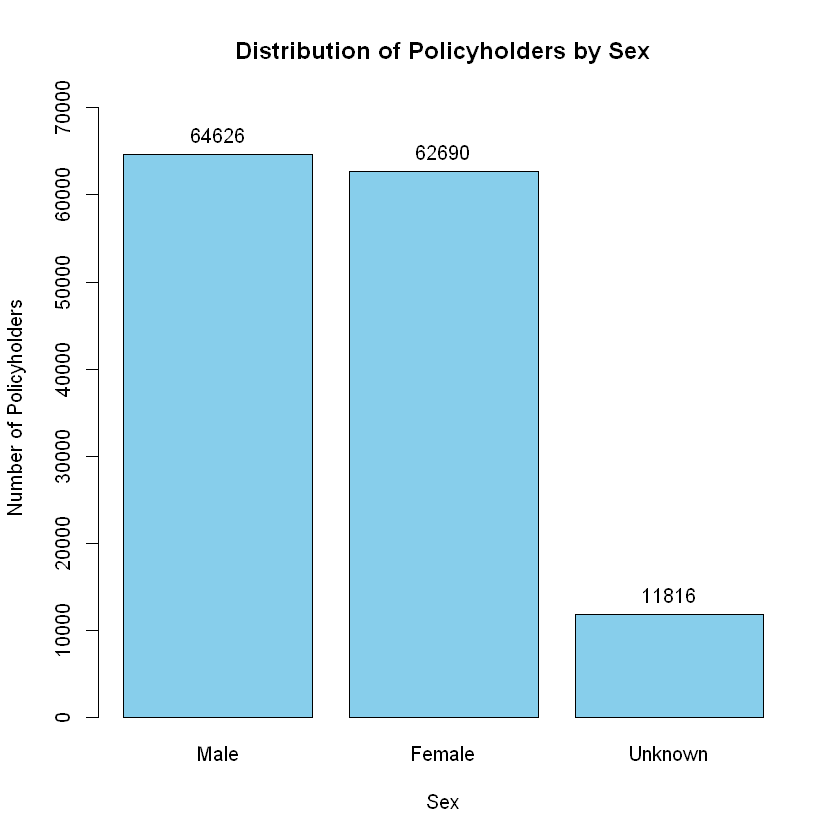

In [63]:
### Frequency table of policyholder gender characteristics
sex_distribution = table(insurance_data$SEX)

# Creating a bar plot to show the gender characteristics of policyholders
sex_distribution_bp = barplot(sex_distribution, 
                               main = "Distribution of Policyholders by Sex", 
                                xlab = "Sex", 
                                ylab = "Number of Policyholders",
                                col = "skyblue",
                                ylim = c(0, max(sex_distribution) * 1.1))

# Adding text labels centered on the bars
text(x = sex_distribution_bp, 
     y = sex_distribution+2, 
     label = sex_distribution, 
     pos = 3, cex = 1, col = "black")

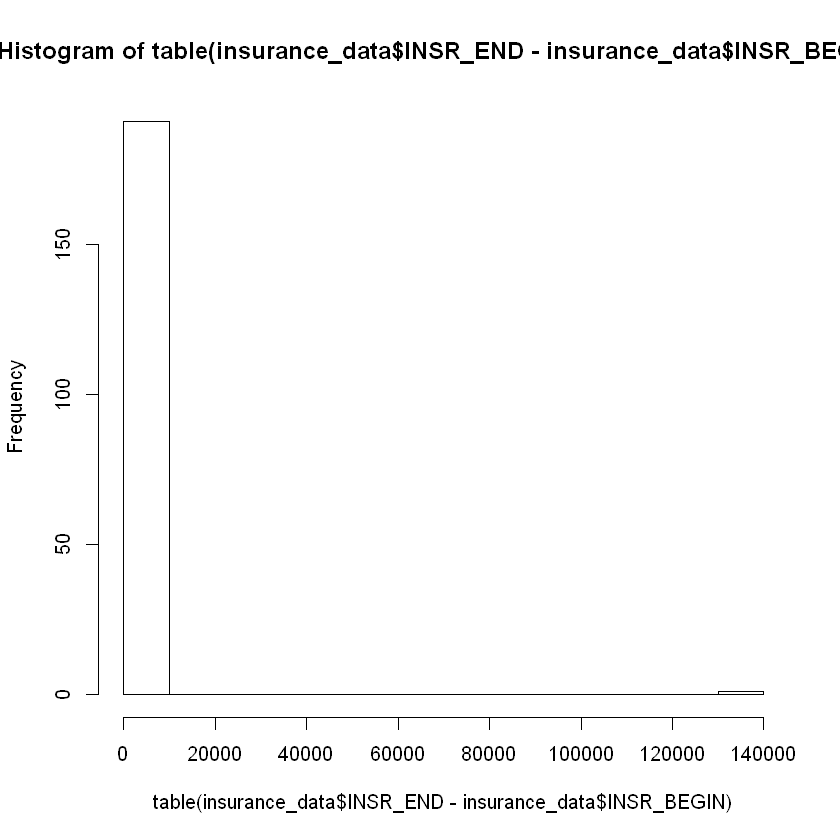

In [68]:
hist(table(insurance_data$INSR_END-insurance_data$INSR_BEGIN),
    breaks=10)

### How does the distribution of insurance types vary by gender among policyholders?

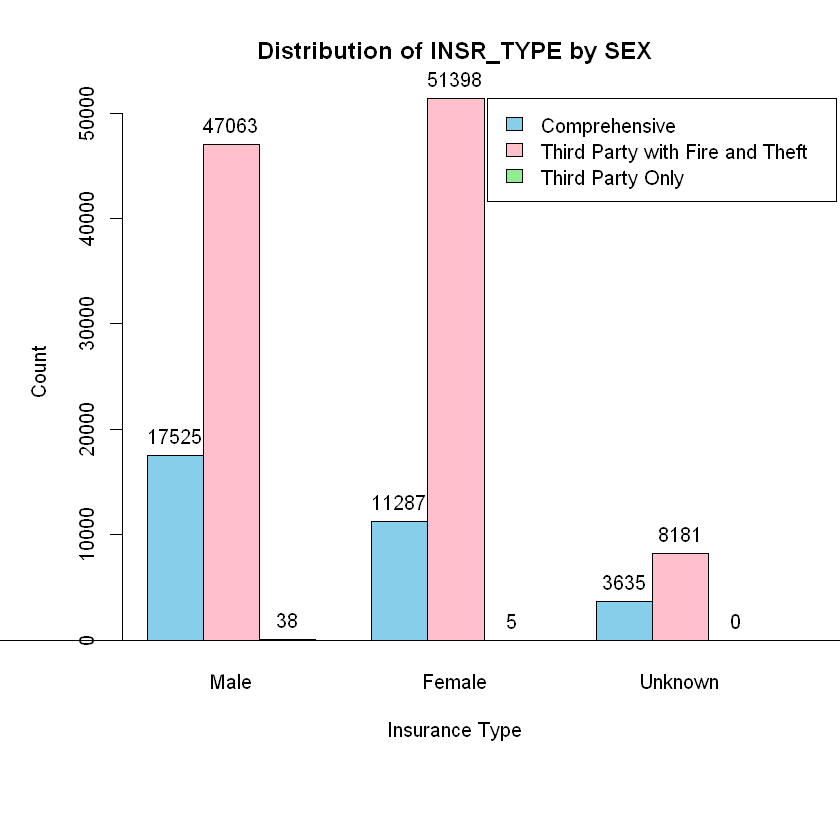

In [84]:
# Distribution of INSR_TYPE relative to SEX
INSR_TYPE_vs_SEX = table(insurance_data$INSR_TYPE, insurance_data$SEX)

# Adjust the plotting area to make space for the legend
par(mar = c(8, 5, 4, 2) + 0.1, oma = c(0, 0, 0, 0), xpd = TRUE)

# Create the bar plot for the contingency table
INSR_TYPE_vs_SEX_bp = barplot(INSR_TYPE_vs_SEX, beside = TRUE, 
                              main = "Distribution of INSR_TYPE by SEX", 
                              xlab = "Insurance Type", 
                              ylab = "Count", 
                              col = c("skyblue", "pink", "lightgreen"))

# Adding text labels centered on the bars
text(x = INSR_TYPE_vs_SEX_bp, 
     y = INSR_TYPE_vs_SEX+2, 
     label = INSR_TYPE_vs_SEX, 
     pos = 3, cex = 1, col = "black")

abline(h=0)

# Add the legend outside the plot area
legend("topright", inset = c(-0.07, 0), legend = rownames(INSR_TYPE_vs_SEX), fill = c("skyblue", "pink", "lightgreen"), xpd = TRUE)



### Summary statistics for PREMIUM

In [73]:
print(min(insurance_data$PREMIUM)
max(insurance_data$PREMIUM)

mean(insurance_data$PREMIUM)
median(insurance_data$PREMIUM)

sd(insurance_data$PREMIUM)

[1] 0

[1] 542942.2

[1] 8364.789

[1] 3412.3

[1] 11927.05

### Are there any correlations between PREMIUM, INSURED_VALUE and PROD_YEAR?

In [74]:
# Creating a dataframe to use for correlation calculations
correlation_df = data.frame(insurance_data$PREMIUM, 
                            insurance_data$INSURED_VALUE, 
                            insurance_data$PROD_YEAR)

# Calculating correlations between variables
corr_matrix = cor(correlation_df)
corr_matrix

,insurance_data.PREMIUM,insurance_data.INSURED_VALUE,insurance_data.PROD_YEAR
insurance_data.PREMIUM,1.0000000,0.7544155,0.2166609
insurance_data.INSURED_VALUE,0.7544155,1.0000000,0.2481529
insurance_data.PROD_YEAR,0.2166609,0.2481529,1.0000000
